## Table of contents

1. <a href="#1.-Necessary Libraries"> Necessary Libraries</a>
2. <a href="#2.-Loading & Reading the Dataset">Loading & Reading the Dataset</a>
3. <a href="#3.-Checking null/Missing values">Checking null/Missing values</a>
4. <a href="#4.-Summary Statistics">Summary Statistics</a>
5. <a href="#5.-Dealing with Categorical/object values">Dealing with Categorical/object values</a>
6. <a href="#6.-Drawing Correlation, Covariance matrix">Drawing Correlation, Covariance matrix</a>
7. <a href="#7.-Visualization of the Data">Visualization of the Data</a>
8. <a href="#8.-Findings Insights">Findings Insights</a>

# 1. Necessasry Libraries

In [ ]:
# Importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading & Reading the dataset

In [ ]:
# Using excel we have taken required data using some preprocessing
# then converted this excel file into csv file
# Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Python/Datasets/conveyance_extended_order_report_07-June-2023_04_29 PM.csv")

In [ ]:
df.head(10)

,Sl No.,Product Name,Product Unit,Unit Price,Quantity,Discount,Total Price
0,1,Product 1,Pc,119.0,30,0.00,3570.0
1,1,Test Product,Pc,110.0,7,0.00,770.0
2,1,Test Product,Pc,110.0,5,0.00,550.0
3,1,Product 2,Pc,235.0,24,14.10,5640.0
4,2,Product 3,Pc,235.0,24,14.10,5640.0
5,3,Product 4,Pc,322.0,24,19.32,7728.0
6,1,Product 5,Pc,21.4,72,0.00,1540.8
7,2,Product 6,Pc,22.4,72,0.00,1612.8
8,1,Product 7,Pc,211.0,60,14.77,12660.0
9,1,Product 8,Pc,121.0,1,0.00,121.0


In [ ]:
df.shape

(708, 7)

**We can see our dataset contains 708 rows and 7 features/columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sl No.        708 non-null    int64  
 1   Product Name  708 non-null    object 
 2   Product Unit  708 non-null    object 
 3   Unit Price    708 non-null    float64
 4   Quantity      708 non-null    int64  
 5   Discount      708 non-null    float64
 6   Total Price   708 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 38.8+ KB


***From a data analyst's perspective, the provided DataFrame contains information about 708 entries of products. Let's break down the columns and their characteristics:***


- **Product Name:** This column contains the names or labels of the products. It is represented as an object data type, indicating it contains string values.

- **Product Unit:** This column represents the unit of measurement for each product. It is also an object data type, suggesting it contains string values such as "pieces", "units.

- **Unit Price:** This column contains the unit price of each product. It is represented as a float64 data type, indicating it contains decimal values.

- **Quantity:** This column represents the quantity of each product purchased. It is an integer data type, indicating it contains whole number values.

- **Discount:** This column represents the discount applied to each product. It is a float64 data type, indicating it contains decimal values.

- **Total Price:** This column contains the total price of each product after considering the quantity and discount. It is also a float64 data type, representing decimal values.

Overall, this DataFrame provides a tabular representation of product-related data, including the product name, unit information, pricing details, quantity, discount, and total price. We can perform various operations on this data, such as analyzing trends, calculating statistics, visualizing patterns, and extracting insights for decision-making purposes.

**More about the dataset**

In [ ]:
# Show all the column names
df.columns

Index(['Sl No.', 'Product Name', 'Product Unit', 'Unit Price', 'Quantity',
       'Discount', 'Total Price'],
      dtype='object')

# 3. Checking Null/Missing values

In [ ]:
# Check for null values and count them
null_count = df.isnull().sum()

null_count

Sl No.          0
Product Name    0
Product Unit    0
Unit Price      0
Quantity        0
Discount        0
Total Price     0
dtype: int64

**Another way to check null/missing values**

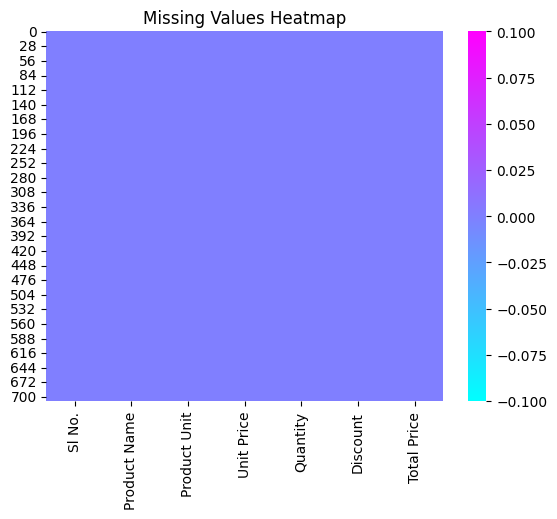

In [ ]:
# Create a boolean mask where True represents missing values
null_mask = df.isnull()

# Use seaborn heatmap to visualize the missing values
sns.heatmap(null_mask, cmap='cool', cbar=True)

# Set plot title
plt.title('Missing Values Heatmap')

# Display the plot
plt.show()

**So, the dataset doesn't have any null or missing values**

# 4. Summary statistics

In [ ]:
# Formatting the dataframe
format_dict = {'Sl No.':'{:.2f}',
                'Unit Price':'${:.2f}',
               'Quantity':'{:.2f}',
               'Discount':'${:.2f}',
               'Total Price':'${:.2f}'}

In [ ]:
df.describe().style.format(format_dict)

,Sl No.,Unit Price,Quantity,Discount,Total Price
count,708.00,$708.00,708.00,$708.00,$708.00
mean,2.37,$196.09,23.25,$3.24,$2193.30
std,2.56,$297.71,31.04,$15.31,$2698.96
min,1.00,$21.40,0.00,$0.00,$0.00
25%,1.00,$52.00,6.00,$0.00,$624.00
50%,2.00,$119.00,12.00,$0.00,$1356.00
75%,3.00,$211.00,30.00,$0.00,$2907.75
max,22.00,$3170.00,336.00,$330.00,$24990.00


Five number summary measure

In [ ]:
df.describe().loc['min':'max'].style.format(format_dict)

,Sl No.,Unit Price,Quantity,Discount,Total Price
min,1.00,$21.40,0.00,$0.00,$0.00
25%,1.00,$52.00,6.00,$0.00,$624.00
50%,2.00,$119.00,12.00,$0.00,$1356.00
75%,3.00,$211.00,30.00,$0.00,$2907.75
max,22.00,$3170.00,336.00,$330.00,$24990.00


## Interpretation of the results:

**Sl No:**

- The count is 708, indicating that all 708 entries have a valid serial number.
- The minimum value is 1, and the maximum value is 22.
- The mean (average) is approximately 2.37, indicating that the serial numbers are relatively low.
- The standard deviation is around 2.56, suggesting that the serial numbers have some variation, but generally, they are close to the mean.

**Unit Price:**

- The count is 708, indicating that there are no missing values in the unit price column.
- The minimum unit price is 21.4, while the maximum is 3170.
- The mean unit price is approximately 196.09, indicating that, on average, the products are priced at this amount.
- The standard deviation is around 297.71, suggesting a wide range of variation in unit prices.
- The 25th percentile is 52, meaning that 25% of the unit prices fall below this value.
- The 50th percentile (median) is 119, indicating that half of the unit prices are below this value.
- The 75th percentile is 211, implying that 75% of the unit prices are below this value.

**Quantity:**

- The count is 708, indicating that there are no missing values in the quantity column.
- The minimum quantity is 0, while the maximum is 336.
- The mean quantity is approximately 23.25, indicating an average quantity of products.
- The standard deviation is around 31.04, suggesting a variation in the quantity of products.
- The 25th percentile is 6, meaning that 25% of the quantities fall below this value.
- The median (50th percentile) is 12, indicating that half of the quantities are below this value.
- The 75th percentile is 30, implying that 75% of the quantities are below this value.

**Discount:**

- The count is 708, indicating that there are no missing values in the discount column.
- The minimum discount is 0, while the maximum is 330.
- The mean discount is approximately 3.24, indicating an average discount percentage applied to the products.
- The standard deviation is around 15.31, suggesting a wide range of variation in the discount percentages.
- The 25th percentile is 0, meaning that 25% of the discounts fall below this value.
- The median (50th percentile) is 0, indicating that half of the discounts are below this value.
- The 75th percentile is 0, implying that 75% of the discounts are below this value.

**Total Price:**

- The count is 708, indicating that there are no missing values in the total price column.
- The minimum total price is 0, while the maximum is 24990.
- The mean total price is approximately 2193.30, indicating an average total price for the products.
- The standard deviation is around 2698.96, suggesting a wide range of variation in the total prices.
- The 25th percentile is 624, meaning that 25% of the total prices fall below this value.
- The median (50th percentile) is 1356, indicating that half of the total prices are below this value.
- The 75th percentile is 2907.75, implying that 75% of the total prices are below this value.

In summary, the data shows that the serial numbers have relatively low values without much variation. The unit prices exhibit a wide range of variation

# 5. Dealing with categorical/object values

We have two object type value:
* Product Name
* Product Unit

**`Product Name` Column**

In [ ]:
df['Product Name'].value_counts()

Product 1     87
Product 6     64
Product 5     58
Product 61    27
Product 16    27
              ..
Product 45     1
Product 51     1
Product 52     1
Product 58     1
Product 78     1
Name: Product Name, Length: 86, dtype: int64

In [ ]:
df['Product Name'].nunique()

86

`**Product Name**` column contains 86 unique values. Here is only two types of values:
 * Test Product
 * Product 1, 2, 3  ___all the way to___  78

 So, I am going the replace the **"Test Product"** with **"0"** and remove only **"Product"** from another category sole keeping the 1, 2, 3  ___all the way to___  78.

In [ ]:
# Replacing 'Test product' with 0 and remove 'product ' from other
# values in 'Product Name' column
df['Product Name'] = df['Product Name'].str.replace('Test Product', '0').str.replace('Product ', '')

# Check the updated DataFrame
df.head(20)

,Sl No.,Product Name,Product Unit,Unit Price,Quantity,Discount,Total Price
0,1,1,Pc,119.0,30,0.00,3570.0
1,1,0,Pc,110.0,7,0.00,770.0
2,1,0,Pc,110.0,5,0.00,550.0
3,1,2,Pc,235.0,24,14.10,5640.0
4,2,3,Pc,235.0,24,14.10,5640.0
5,3,4,Pc,322.0,24,19.32,7728.0
6,1,5,Pc,21.4,72,0.00,1540.8
7,2,6,Pc,22.4,72,0.00,1612.8
8,1,7,Pc,211.0,60,14.77,12660.0
9,1,8,Pc,121.0,1,0.00,121.0


**`Product Unit`** Column

In [ ]:
df['Product Unit'].value_counts()

Pc    708
Name: Product Unit, dtype: int64

In the **`Product Unit`** column there is only one type of product (Pc). So we can drop the column as there won't be any impact for further analysis.

In [ ]:
# Droping "Product Unit" column
df = df.drop(['Product Unit'], axis=1)
df.head()

,Sl No.,Product Name,Unit Price,Quantity,Discount,Total Price
0,1,1,119.0,30,0.0,3570.0
1,1,0,110.0,7,0.0,770.0
2,1,0,110.0,5,0.0,550.0
3,1,2,235.0,24,14.1,5640.0
4,2,3,235.0,24,14.1,5640.0


# 6. Drawing correlation, covariance matrix

For correlation and covariance matrix we will select

`Unit Price`, `Quantity`, `Discount`, `Total Price` columns.

In [ ]:
mat_col = df[['Unit Price','Quantity','Discount','Total Price']]
mat_col

,Unit Price,Quantity,Discount,Total Price
0,119.0,30,0.00,3570.0
1,110.0,7,0.00,770.0
2,110.0,5,0.00,550.0
3,235.0,24,14.10,5640.0
4,235.0,24,14.10,5640.0
...,...,...,...,...
703,235.0,12,14.10,2820.0
704,211.0,48,12.66,10128.0
705,211.0,48,12.66,10128.0
706,119.0,10,3.00,1190.0


## **Correlation between features**

In [ ]:
mat_col.corr().style.format(format_dict)

,Unit Price,Quantity,Discount,Total Price
Unit Price,$1.00,-0.26,$0.13,$0.23
Quantity,$-0.26,1.00,$-0.06,$0.40
Discount,$0.13,-0.06,$1.00,$0.08
Total Price,$0.23,0.40,$0.08,$1.00


**Visual representation of correlation matrix**

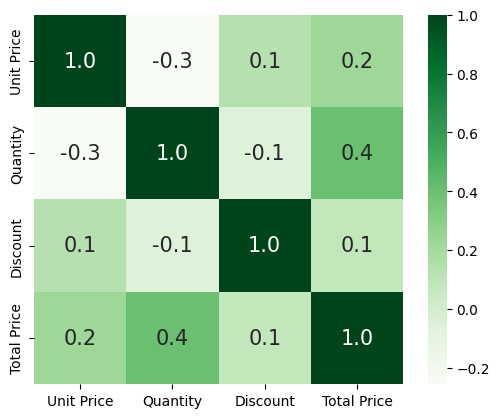

In [ ]:
# Plotting the heatmap of correlation between features

sns.heatmap(mat_col.corr(), cbar=True, square= True, fmt='.1f',
            annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

## Interpretation:
The correlation matrix represents the relationships between different variables in a dataset. In this case, we have a correlation matrix with four variables: Unit Price, Quantity, Discount, and Total Price. Let's interpret the values:

* **Unit Price vs. Unit Price:**
The correlation coefficient is 1.000000, indicating a perfect positive correlation.
This is expected since the variable is compared with itself.
It suggests that there is a strong relationship between the unit price and itself, as expected.

* **Unit Price vs. Quantity:**
The correlation coefficient is -0.256374, indicating a weak negative correlation.
It suggests that as the unit price increases, the quantity decreases slightly.
However, the correlation is not strong, meaning there may be other factors influencing the relationship.

* **Unit Price vs. Discount:**
The correlation coefficient is 0.134568, indicating a weak positive correlation.
It suggests that as the unit price increases, the discount also tends to increase slightly.
However, the correlation is not strong, implying that other factors may have a more significant impact on the discount.

* **Unit Price vs. Total Price:**
The correlation coefficient is 0.227544, indicating a weak positive correlation.
It suggests that as the unit price increases, the total price also tends to increase slightly.
However, the correlation is not strong, implying that other factors may have a more significant influence on the total price.

* **Quantity vs. Quantity:**
The correlation coefficient is 1.000000, indicating a perfect positive correlation.
This is expected since the variable is compared with itself.
It suggests that there is a strong relationship between the quantity and itself, as expected.

* **Quantity vs. Discount:**
The correlation coefficient is -0.056051, indicating a very weak negative correlation.
It suggests that there is almost no relationship between the quantity and the discount.
The correlation is close to zero, indicating that changes in one variable do not correspond to consistent changes in the other.

* **Quantity vs. Total Price:**
The correlation coefficient is 0.403068, indicating a moderate positive correlation.
It suggests that as the quantity increases, the total price tends to increase as well.
The correlation coefficient is relatively higher compared to other variables, indicating a stronger relationship between quantity and total price.

* **Discount vs. Discount:**
The correlation coefficient is 1.000000, indicating a perfect positive correlation.
This is expected since the variable is compared with itself.
It suggests that there is a strong relationship between the discount and itself, as expected.

* **Discount vs. Total Price:**
The correlation coefficient is 0.082021, indicating a very weak positive correlation.
It suggests that there is almost no relationship between the discount and the total price.
The correlation is close to zero, indicating that changes in one variable do not correspond to consistent changes in the other.

* **Total Price vs. Total Price:**
The correlation coefficient is 1.000000, indicating a perfect positive correlation.
This is expected since the variable is compared with itself.
It suggests that there is a strong relationship between the total price and itself, as expected.

In summary, the correlation matrix shows the relationships between variables in the dataset. It indicates that there is a weak negative correlation between unit price and quantity, a weak positive correlation between unit price and discount as well as between unit price and total price. **There is a moderate positive correlation between quantity and total price.** The correlations between quantity and discount, as well as discount and total price, are very weak.

## Covariance between features

In [ ]:
mat_col.cov().style.format(format_dict)

,Unit Price,Quantity,Discount,Total Price
Unit Price,$88631.54,-2369.07,$613.34,$182833.17
Quantity,$-2369.07,963.43,$-26.64,$33766.36
Discount,$613.34,-26.64,$234.38,$3389.11
Total Price,$182833.17,33766.36,$3389.11,$7284378.50


## Interpretation
The covariance matrix represents the covariances between different features in the dataset. It shows how the variables vary together. In this matrix, we observe that

* **`unit price and total price`** have a **large positive covariance**, indicating that they tend to increase or decrease together.

* `quantity and total price` also have a **positive covariance**, suggesting a relationship between them.

* `unit price and quantity`, and  `unit price and discount`, have **negative covariances**, implying an inverse relationship.

The covariance matrix provides insights into the relationships and variations between the features, highlighting which variables tend to move together and how they relate to each other.


# 7. Visualization of the Data

## **Histogram of the features**

In [ ]:
df.head()

,Sl No.,Product Name,Unit Price,Quantity,Discount,Total Price
0,1,1,119.0,30,0.0,3570.0
1,1,0,110.0,7,0.0,770.0
2,1,0,110.0,5,0.0,550.0
3,1,2,235.0,24,14.1,5640.0
4,2,3,235.0,24,14.1,5640.0


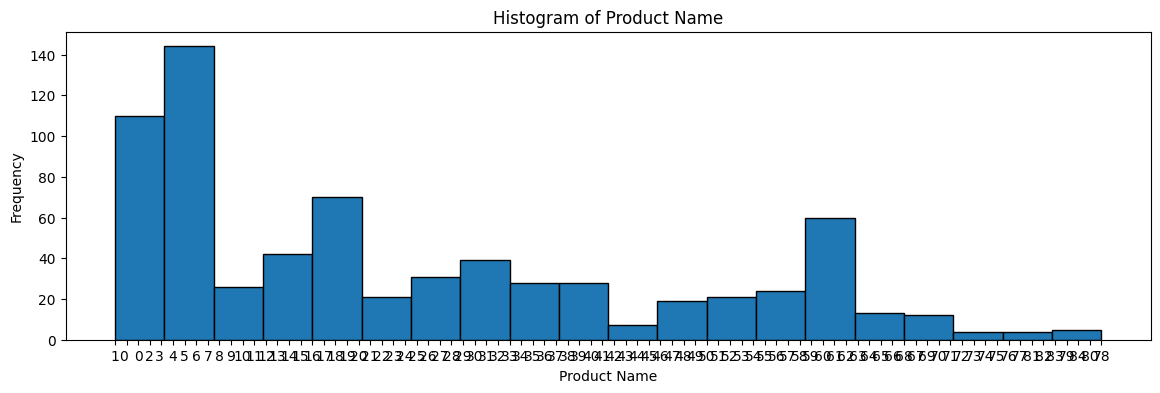

In [ ]:
plt.figure(figsize=(14, 4))
plt.hist(df['Product Name'], bins=20, edgecolor='black')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.title('Histogram of Product Name')
plt.show()

**Findings:**
* This plot seems very unclear.
* Lrts find the values in numerical way

In [ ]:
df['Product Name'].value_counts()

1     87
6     64
5     58
61    27
16    27
      ..
45     1
51     1
52     1
58     1
78     1
Name: Product Name, Length: 86, dtype: int64

**Findings:**
* From this values we can illustrate that most frequently sales product is Product 1, Product 6 and Product 5.

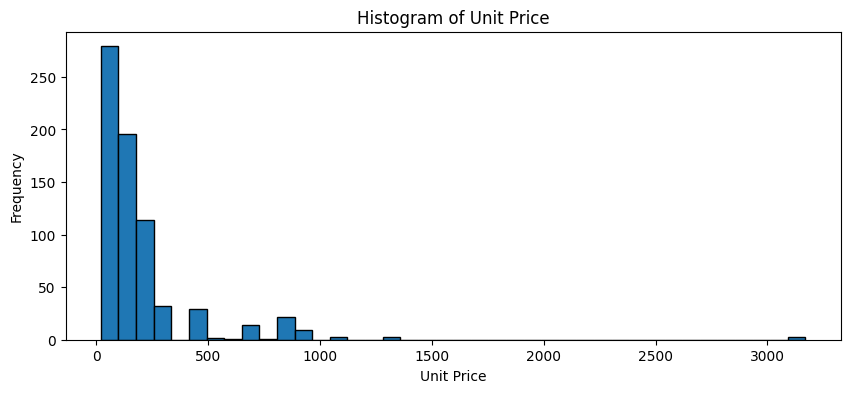

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['Unit Price'], bins=40, edgecolor='black')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Histogram of Unit Price')
plt.show()

**Findings:**
* Most of the every individual product's price is approximetly between 0 to 300.

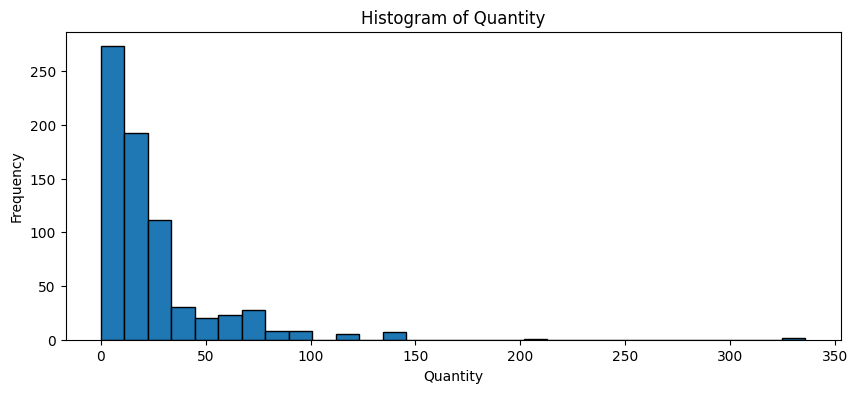

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['Quantity'], bins=30, edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.show()

**Findings:**
* The graphs shows most of the quantity lies between approximetly 0 to 35.

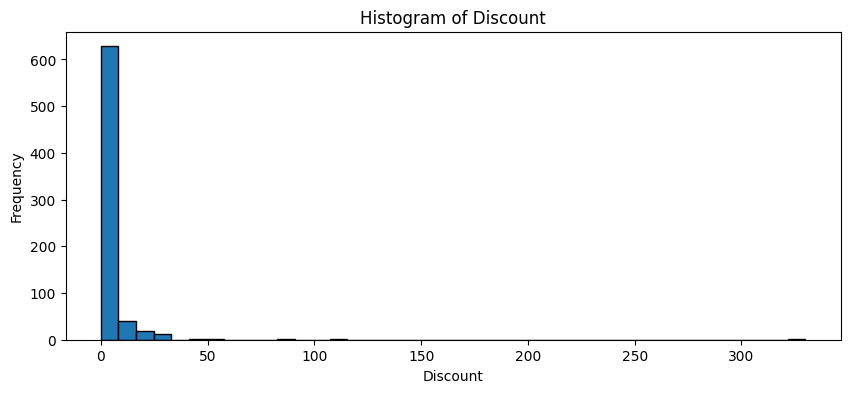

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['Discount'], bins=40, edgecolor='black')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Histogram of Discount')
plt.show()

**Findings:**
 * Histogram shows most of the discount lies between 0 to 10 percent.
 * We can see there is some outliers cause discount can not be more than 100%.
 * So we shoud handle the outliers also for more clearification increasing the bin number to 100.

**Handaling `Discount` faeture outliers**

In [ ]:
# Calculate the median of the 'Discount' column
median_discount = df['Discount'].median()

# Replace values greater than 100 with the median
df.loc[df['Discount'] > 100, 'Discount'] = median_discount

**Without outliers `Discount` feature Histogram**

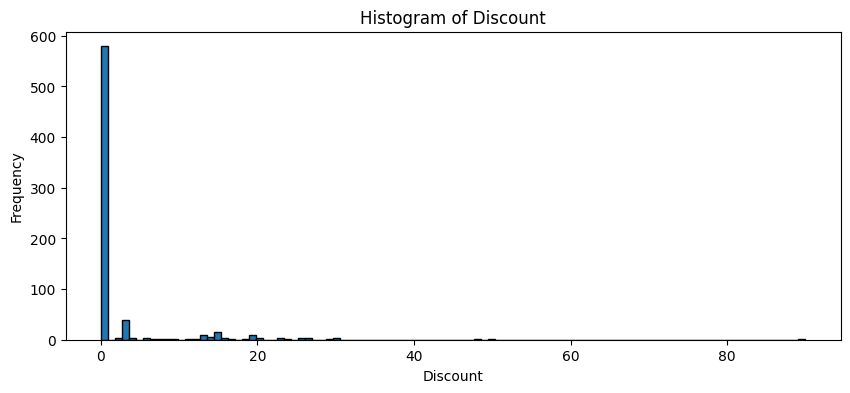

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['Discount'], bins=100, edgecolor='black')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.title('Histogram of Discount')
plt.show()

**Findings:**
* Now it is clear that only few sales are with discount and the discount are less than 30%.

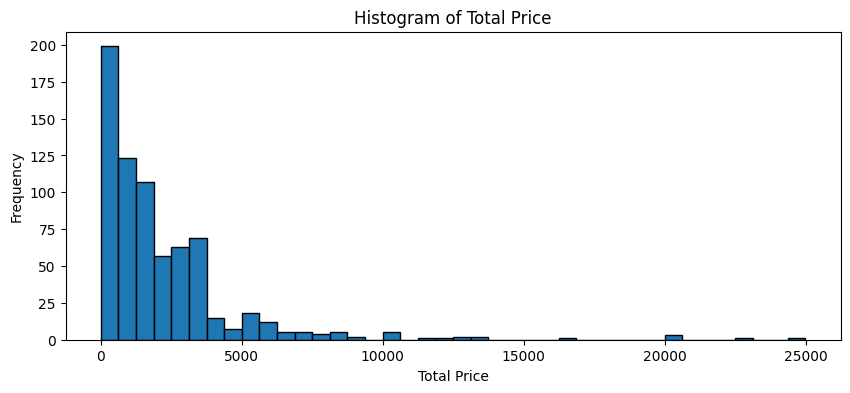

In [ ]:
plt.figure(figsize=(10, 4))
plt.hist(df['Total Price'], bins=40, edgecolor='black')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Histogram of Total Price')
plt.show()

**Findings:**
* This histogram represent the sales price for individual customer and how much money they spend. It shows most of the sales price between 0 to 4000. Also there is some big amount of sales though frequency is very low.

# 8. Findings Insights:

## How much sales in Price?

In [ ]:
total_sales = df['Total Price'].sum()
total_sales

1552853.2

**Findings:**
* Total Sales is $1,552,853.2

## Which product is doing good by Total Price?

In [ ]:
df.groupby('Product Name')['Total Price'].sum().reset_index().sort_values(by='Total Price', ascending=False)

,Product Name,Total Price
2,1,279650.0
33,38,97020.0
57,6,88076.8
59,61,76450.0
52,55,74643.0
...,...,...
77,78,822.0
81,81,750.0
0,0,550.0
82,82,548.0


Findings:
* From the table we can see most of the sales are from "Product 1"
* Total ammount of sales is $2,79,650 that is 3 times than second highest sales product which is "Product 38"

## Which product is doing good by total Quantity Sold?

In [ ]:
df.groupby('Product Name')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)

,Product Name,Quantity
57,6,3932
46,5,3306
2,1,2350
8,15,630
9,16,613
...,...,...
30,35,3
83,83,3
55,58,3
82,82,2


Findings:
* Most of the sold products are `"Product 6"` which is 3932.
* Second & Third most sold products are respectively `"Product 5"` `"Product 1"`
* The lowest sold products are `"Product 81"`

## Most costly and cheap product?

In [ ]:
max_value = df['Unit Price'].max()
max_df = df[df['Unit Price'] == max_value]
max_df[['Product Name', 'Unit Price']].head(1)

,Product Name,Unit Price
43,21,3170.0


**Findings:**
* Most costly product is "Product 21" and the price is $3170

In [ ]:
min_value = df['Unit Price'].min()
min_df = df[df['Unit Price'] == min_value]
min_df[['Product Name', 'Unit Price']]

,Product Name,Unit Price
6,5,21.4
25,5,21.4
26,15,21.4
27,16,21.4
33,15,21.4
...,...,...
654,15,21.4
658,5,21.4
666,5,21.4
667,15,21.4


In [ ]:
min_df['Product Name'].nunique()

3

**Findings:**
* From the above analysis we can see there are 3 unique products`("Product 5", "Product 15" and "Product 16")` carries the lowest unit price.
* Chaep Product price is $21.4

## How many Customers do we have?(count of 1)

In [ ]:
num_cus = df[df['Sl No.'] == 1].count()
num_cus['Sl No.']

348

**Findings:**
* We have total 348 customers